##  Implement and understand simple & multiple linear regression.

###  1. Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Load Dataset :

In [2]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 3.Data Preprocessing :

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


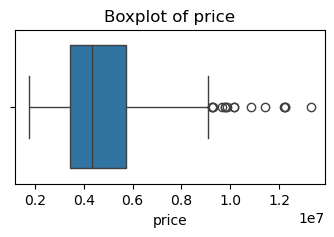

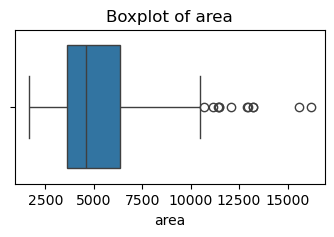

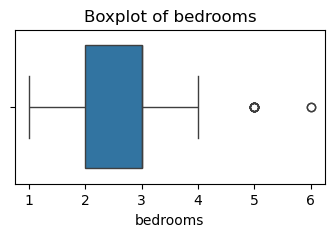

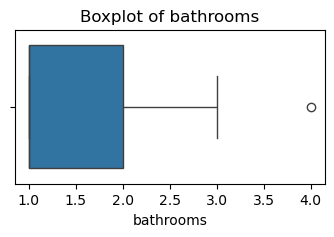

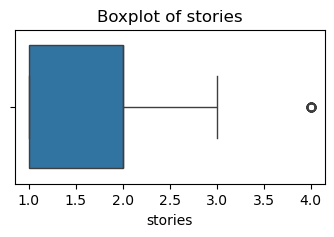

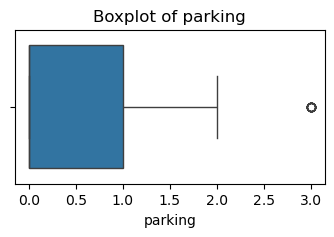

In [37]:
## Cheking outliers using boxplot :
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms','stories','parking']

for col in numerical_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## 4. Dependent and Independent Variable :

In [13]:
y = df['price']  # Target variable

# Drop the target column to get independent variables
X = df.drop('price', axis=1)

# Handle categorical (object) features using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first avoids multicollinearity


## 5. Split into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [30]:
# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


## 6. Fit Linear Regression Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 7. Evaluate Model

In [17]:
 y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.65


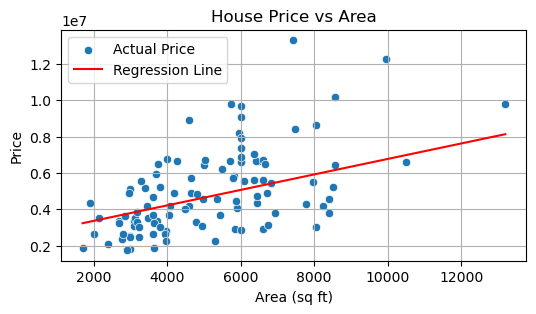

In [34]:
# Train model using one feature for visualization
X_single = df[['area']]
y_single = df['price']

X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)

y_pred_single = model_single.predict(X_test_single)

 #Plotting
plt.figure(figsize=(6, 3))
sns.scatterplot(x=X_test_single['area'], y=y_test_single, label='Actual Price')
sns.lineplot(x=X_test_single['area'], y=y_pred_single, color='red', label='Regression Line')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("House Price vs Area")
plt.legend()
plt.grid(True)
plt.show()

## 8. Print coefficients

In [33]:
print("Intercept:", model_single.intercept_)
print("For every 1 unit increase in 'area', the predicted house price increases by:", model_single.coef_[0])

Intercept: 2512254.2639593435
For every 1 unit increase in 'area', the predicted house price increases by: 425.72984193878284
